In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('./SMAI-Dataset-hc-dataset/new_customers.csv')

data = data.iloc[:, 1:].values

# encode the first column as it is gender
labelencoder_X = LabelEncoder()
data[:, 0] = labelencoder_X.fit_transform(data[:, 0])

# standardize the data
data = np.array(data, dtype=np.float64)
data = (data - data.mean(axis=0)) / data.std(axis=0)

print(data.shape)

(200, 4)


In [11]:
class HierarchicalCluster:
  def __init__(self, method='single'):
    self.method = method
    
  def linkages(self, data, linkage_type):
    return sch.linkage(data, method=linkage_type)

  def dendrogram(self, linkage_matrix):
    return sch.dendrogram(linkage_matrix)

#### Task 3.1

Linkage type:  single


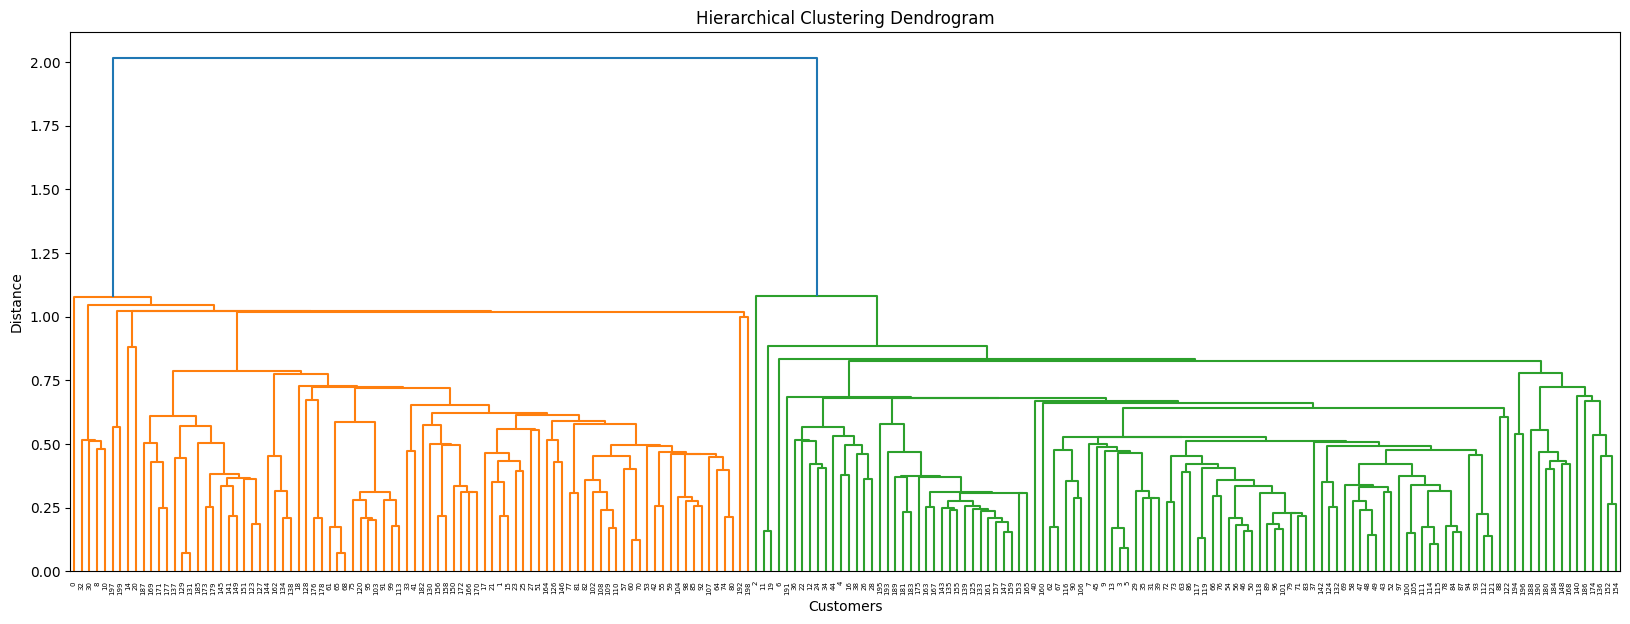

Linkage type:  complete


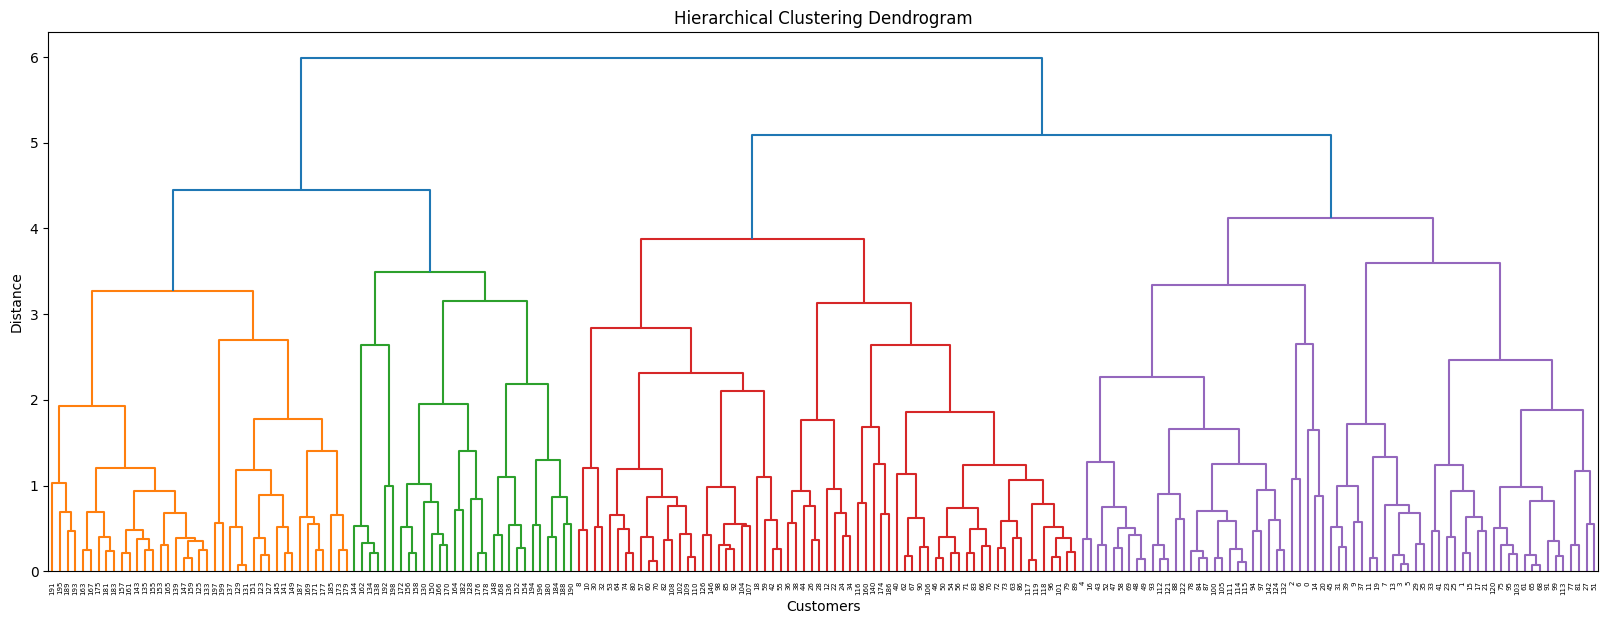

Linkage type:  average


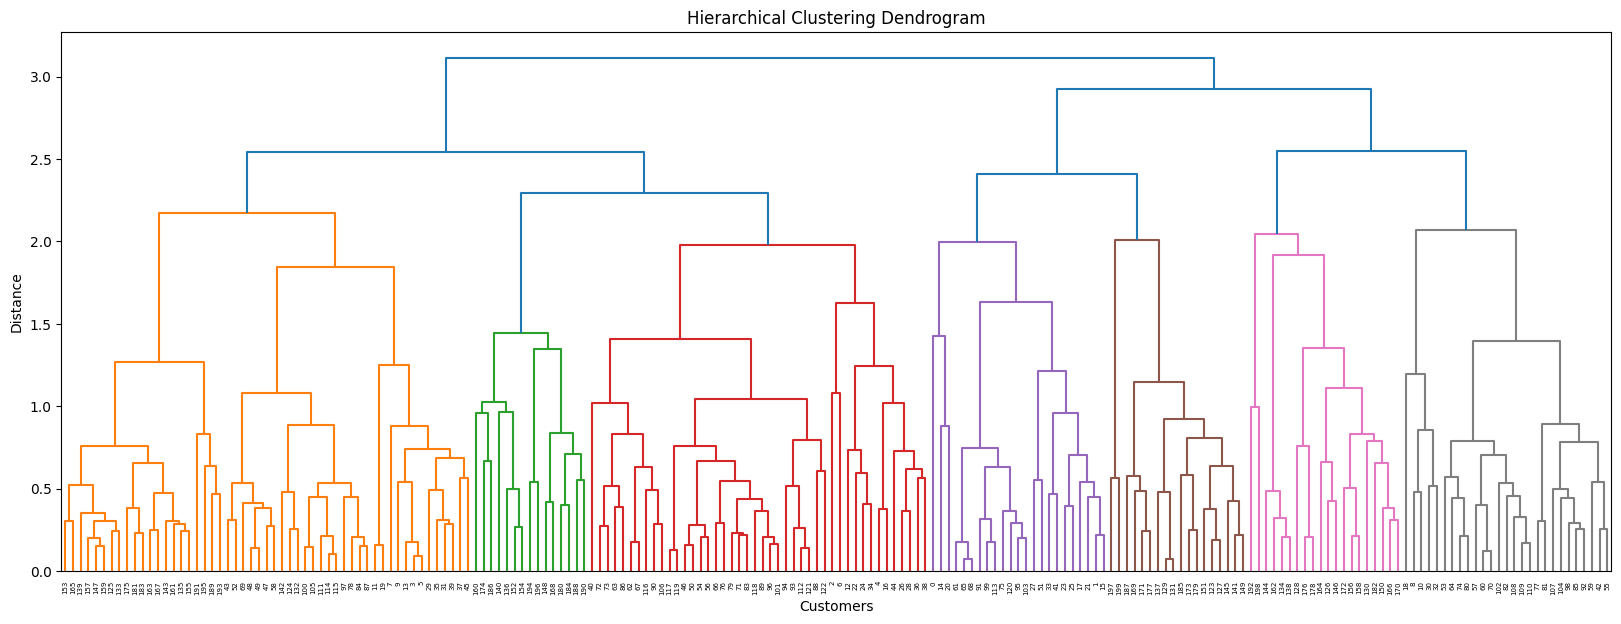

Linkage type:  ward


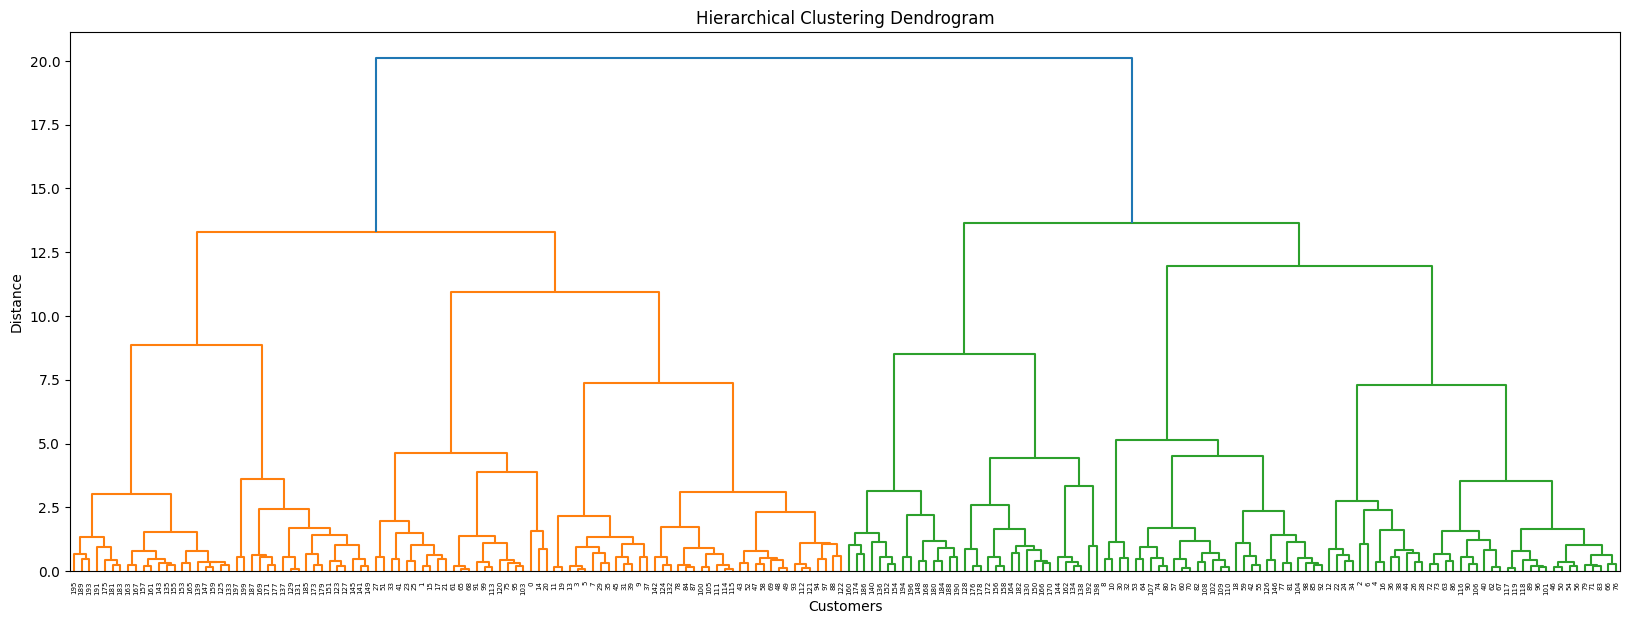

In [12]:
hc = HierarchicalCluster()
linkages = ['single', 'complete', 'average', 'ward']
for linkage in linkages:
  print('Linkage type: ', linkage)
  linkage_matrix = hc.linkages(data, linkage)
  plt.figure(figsize=(20, 7))
  dendrogram = hc.dendrogram(linkage_matrix)
  plt.title('Hierarchical Clustering Dendrogram')
  plt.xlabel('Customers')
  plt.ylabel('Distance')
  plt.show()


Varying features for single linkage


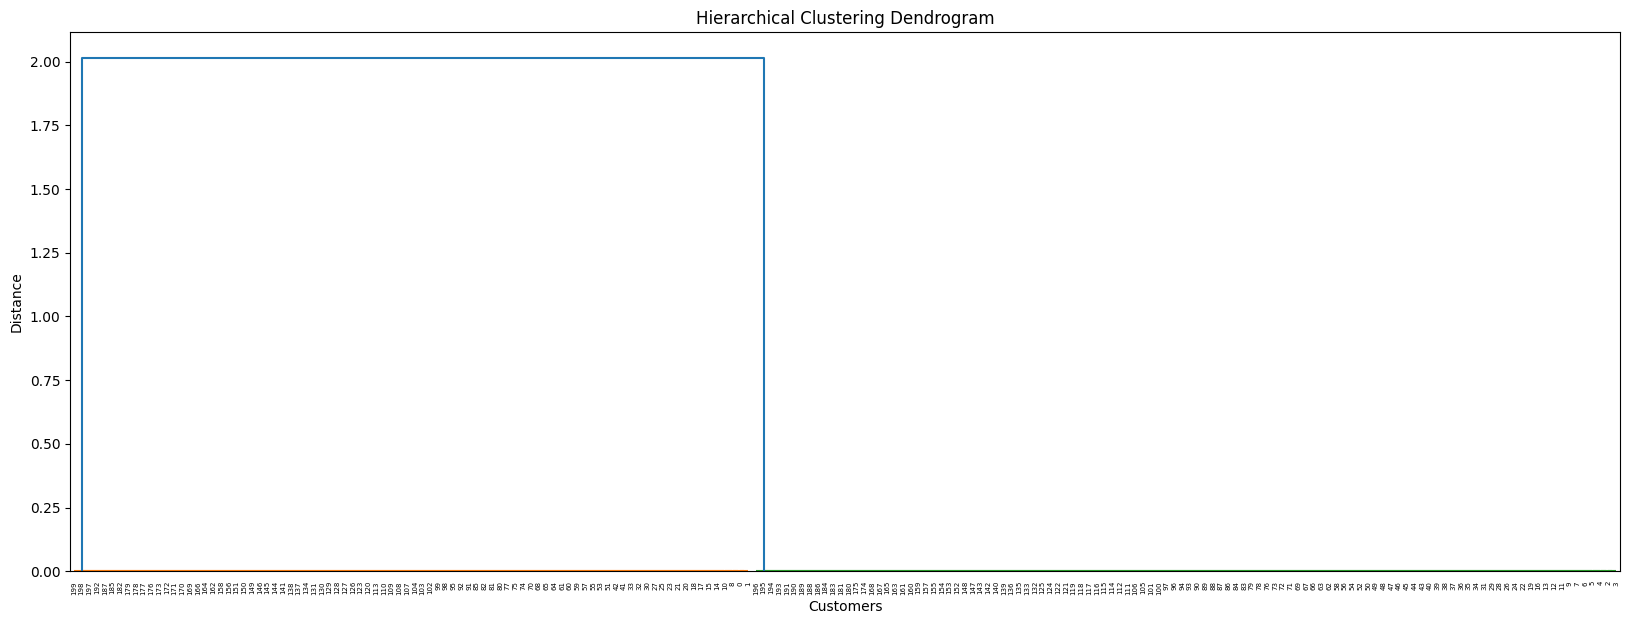

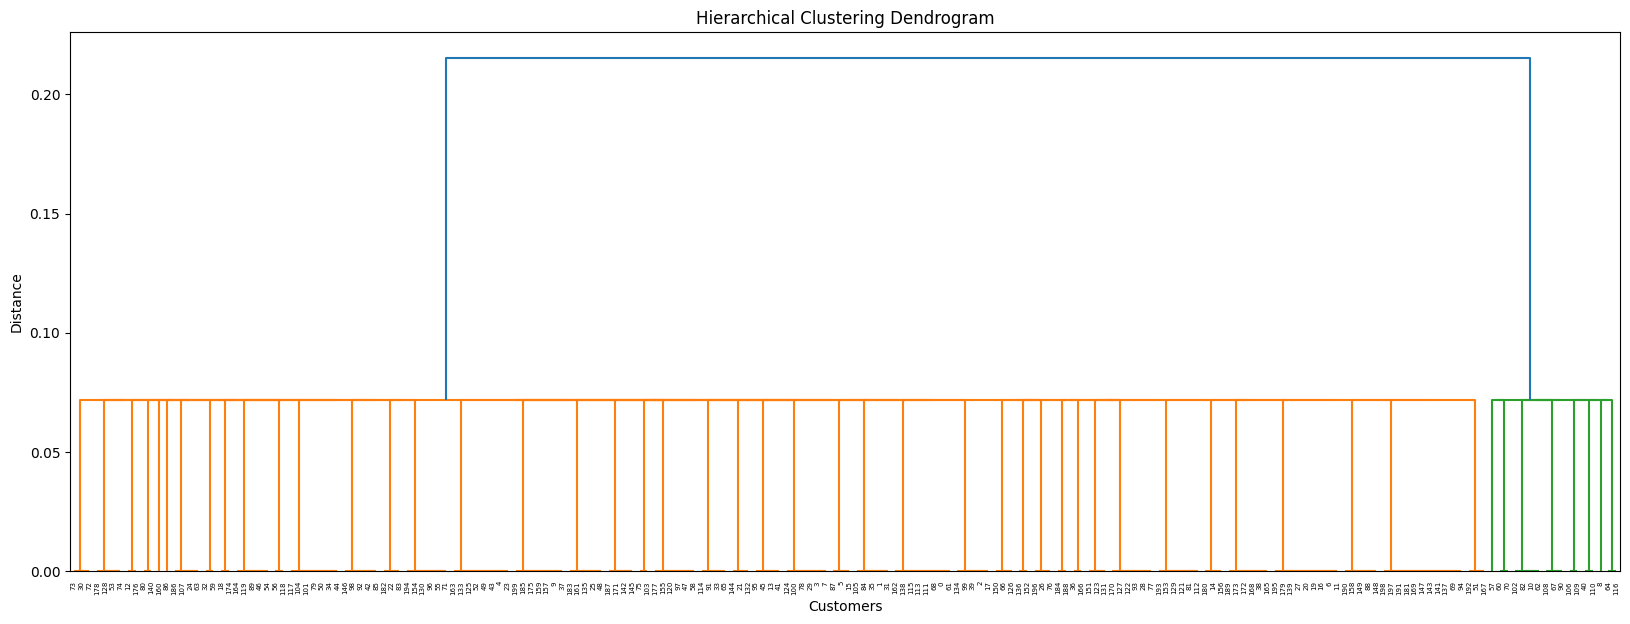

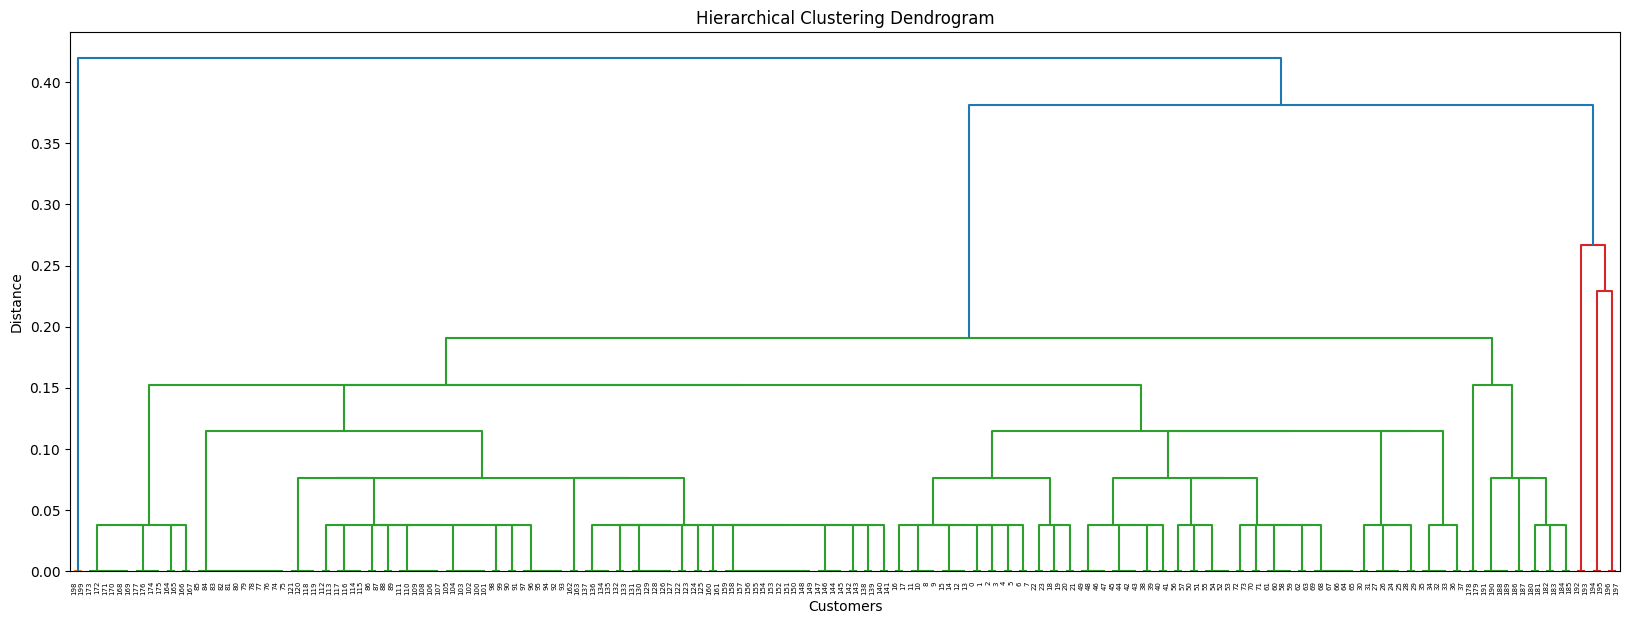

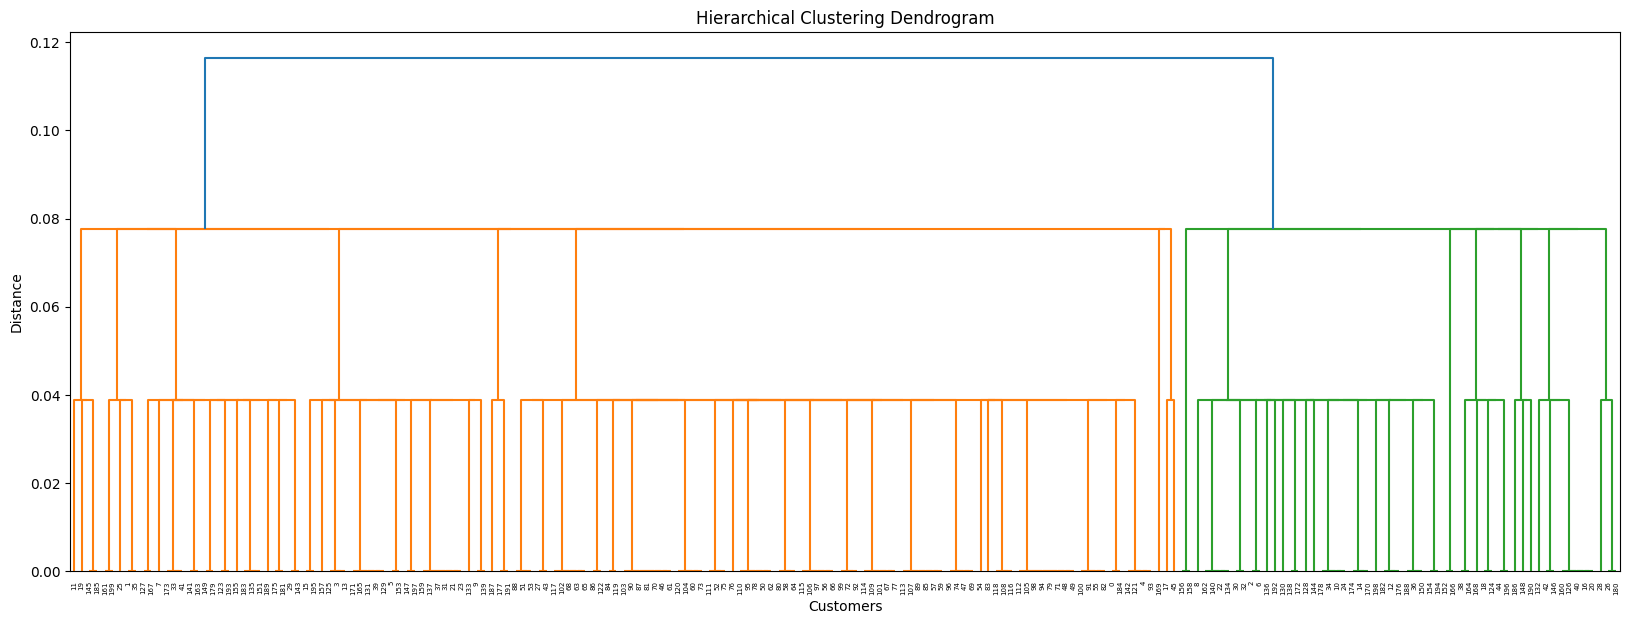

In [13]:
print("Varying features for single linkage")
for i in range(4):
  linkage_matrix = hc.linkages(data[:, i:i+1], 'single')
  plt.figure(figsize=(20, 7))
  dendrogram = hc.dendrogram(linkage_matrix)
  plt.title('Hierarchical Clustering Dendrogram')
  plt.xlabel('Customers')
  plt.ylabel('Distance')
  plt.show()

#### Task 3.2

In [14]:
data = pd.read_csv('./SMAI-Dataset-gene-expression/gene.csv')
# print(data)
data = data.iloc[:, 1:].values
# print(data)

# standardize the data
data = np.array(data, dtype=np.float64)
data = (data - data.mean(axis=0)) / data.std(axis=0)
print(data.shape)

(58, 12)


Linkage type:  single


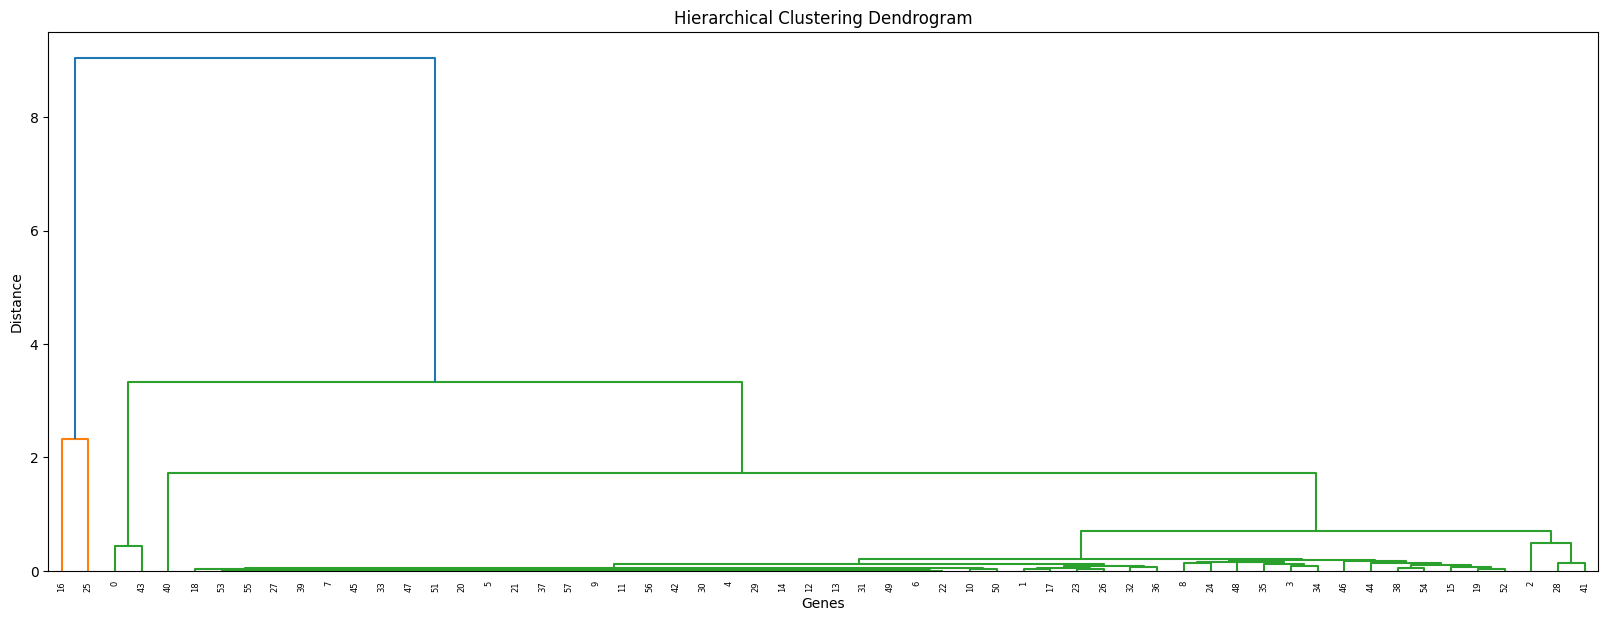

Linkage type:  complete


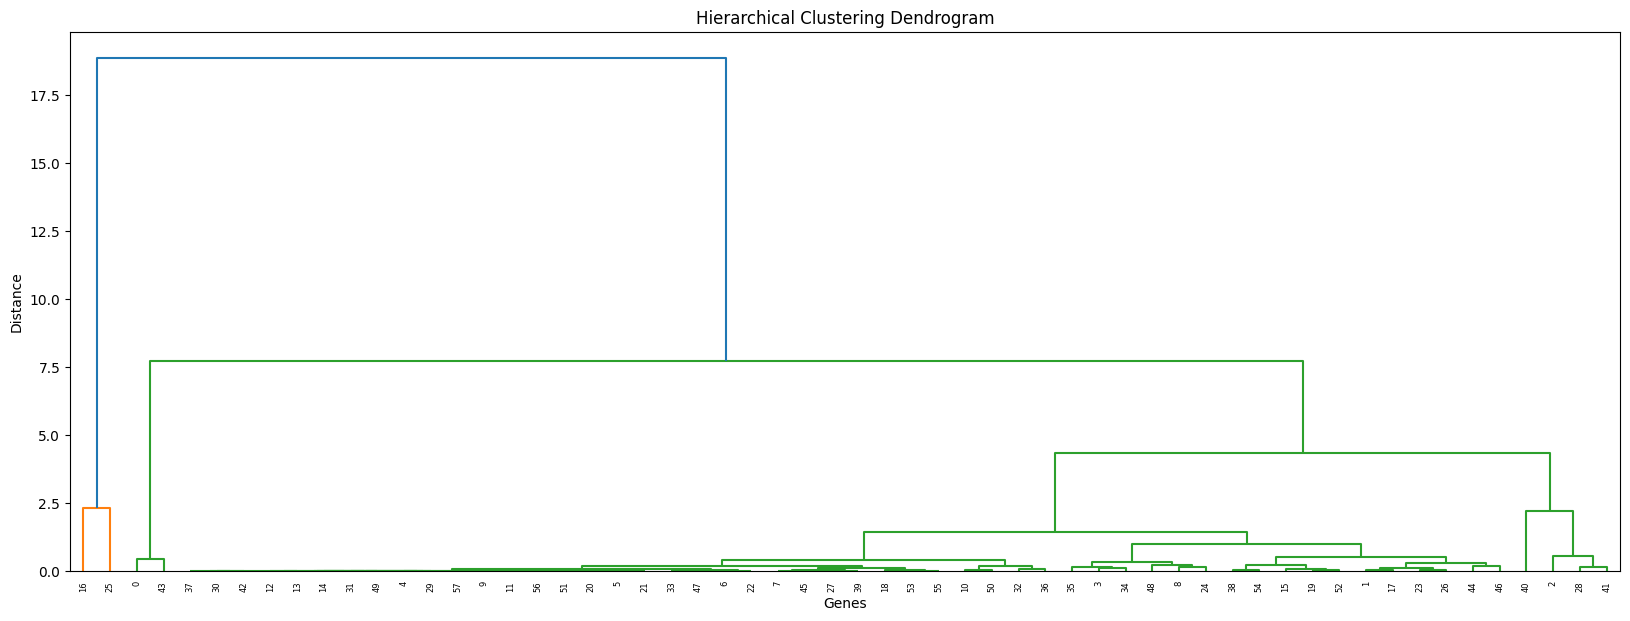

Linkage type:  average


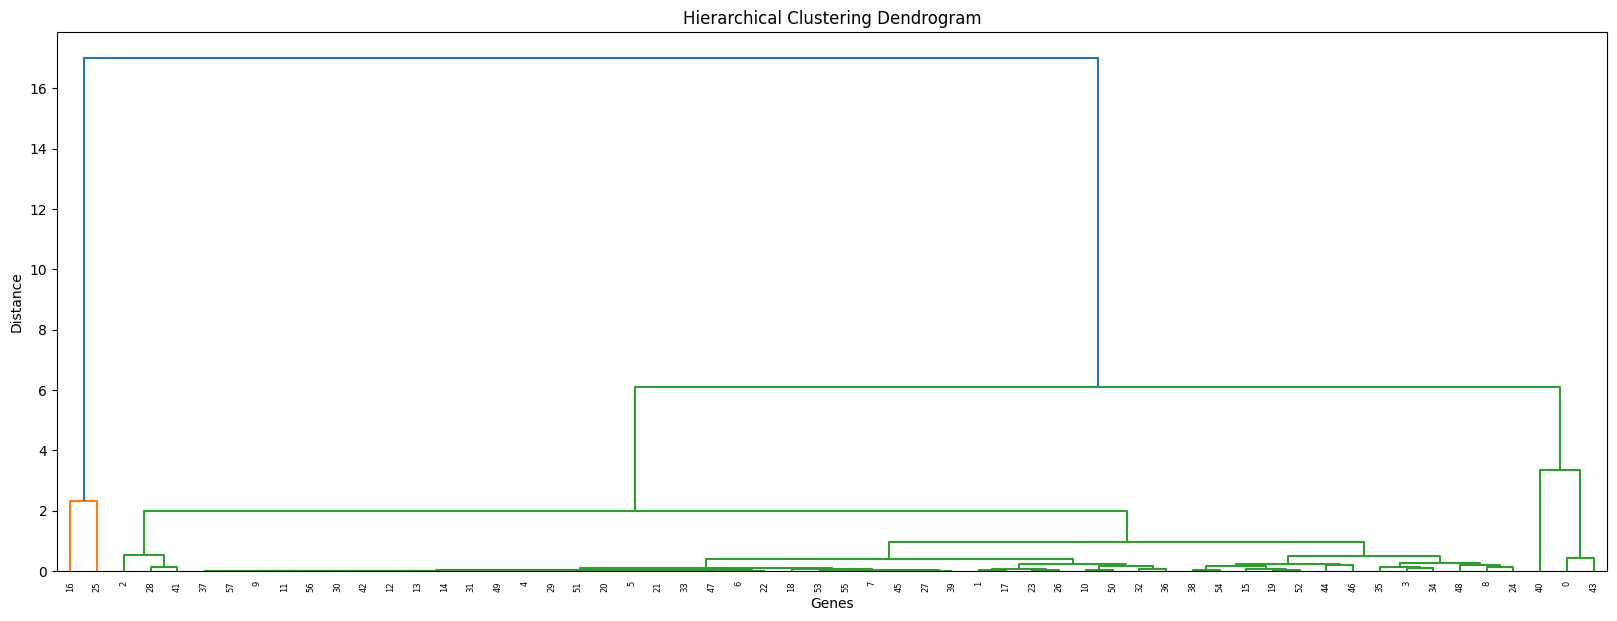

Linkage type:  ward


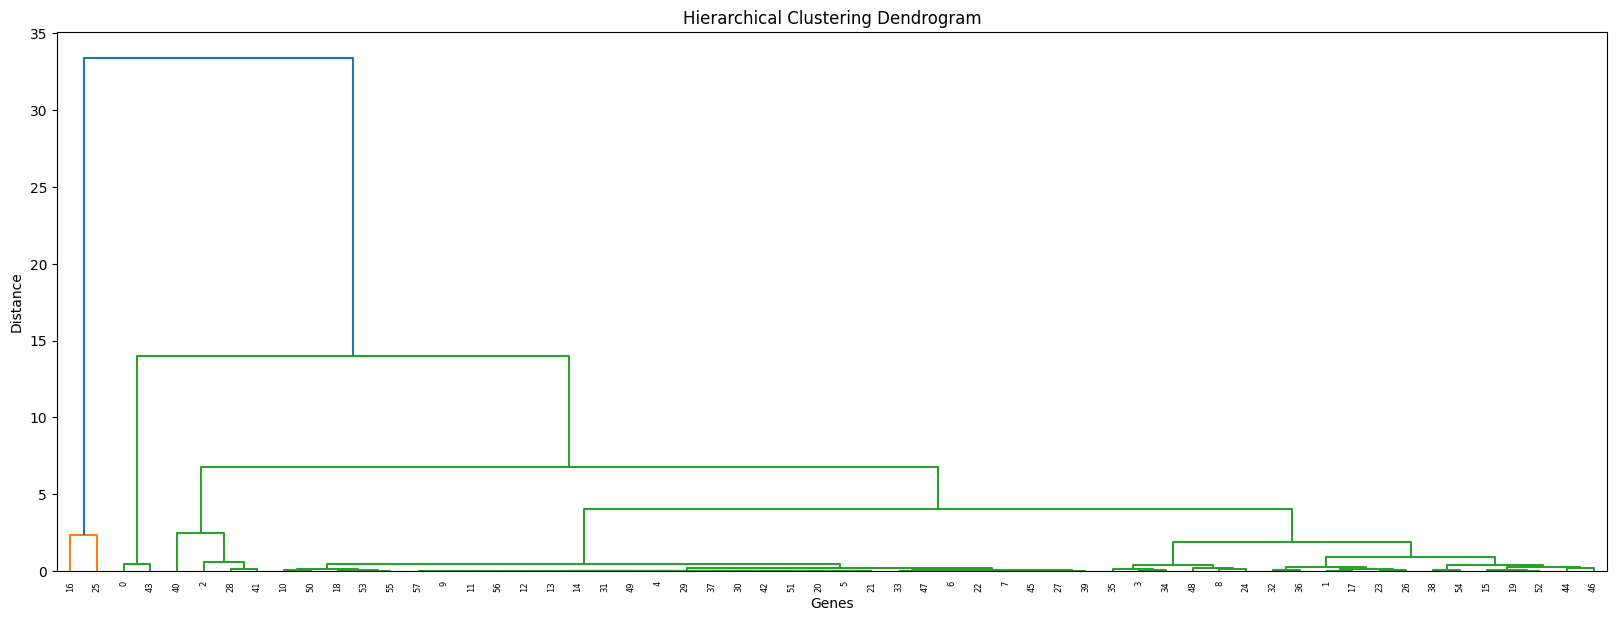

In [15]:
hc = HierarchicalCluster()
linkages = ['single', 'complete', 'average', 'ward']
# varing the linkage type
for linkage in linkages:
  print('Linkage type: ', linkage)
  linkage_matrix = hc.linkages(data, linkage)
  plt.figure(figsize=(20, 7))
  dendrogram = hc.dendrogram(linkage_matrix)
  plt.title('Hierarchical Clustering Dendrogram')
  plt.xlabel('Genes')
  plt.ylabel('Distance')
  plt.show()

Varying the features


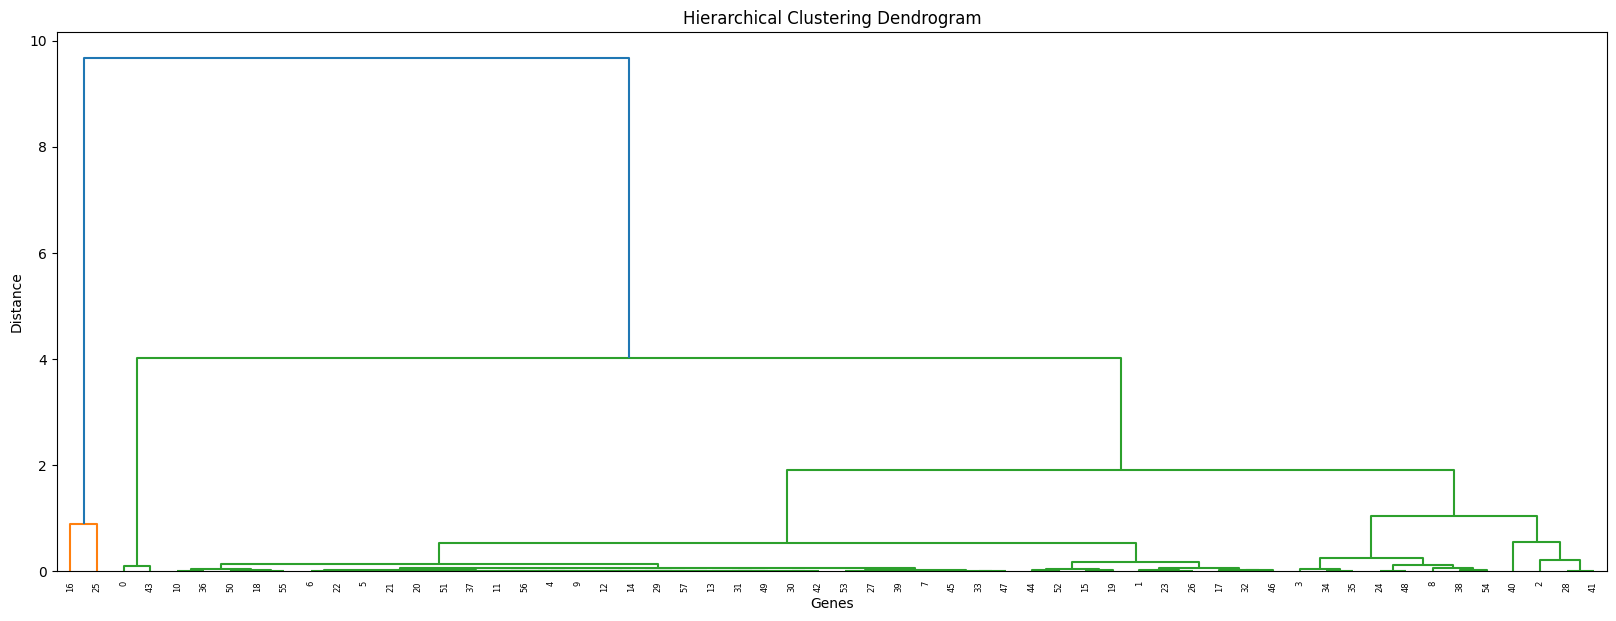

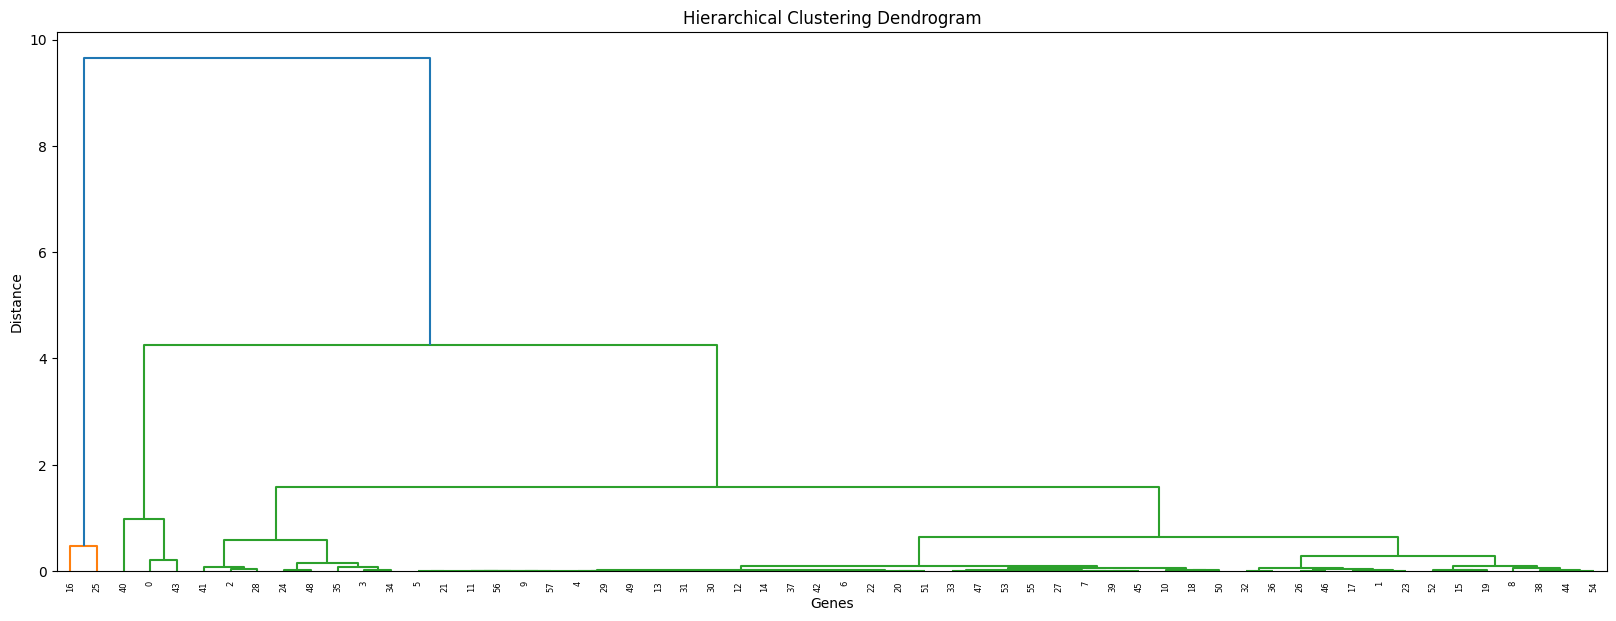

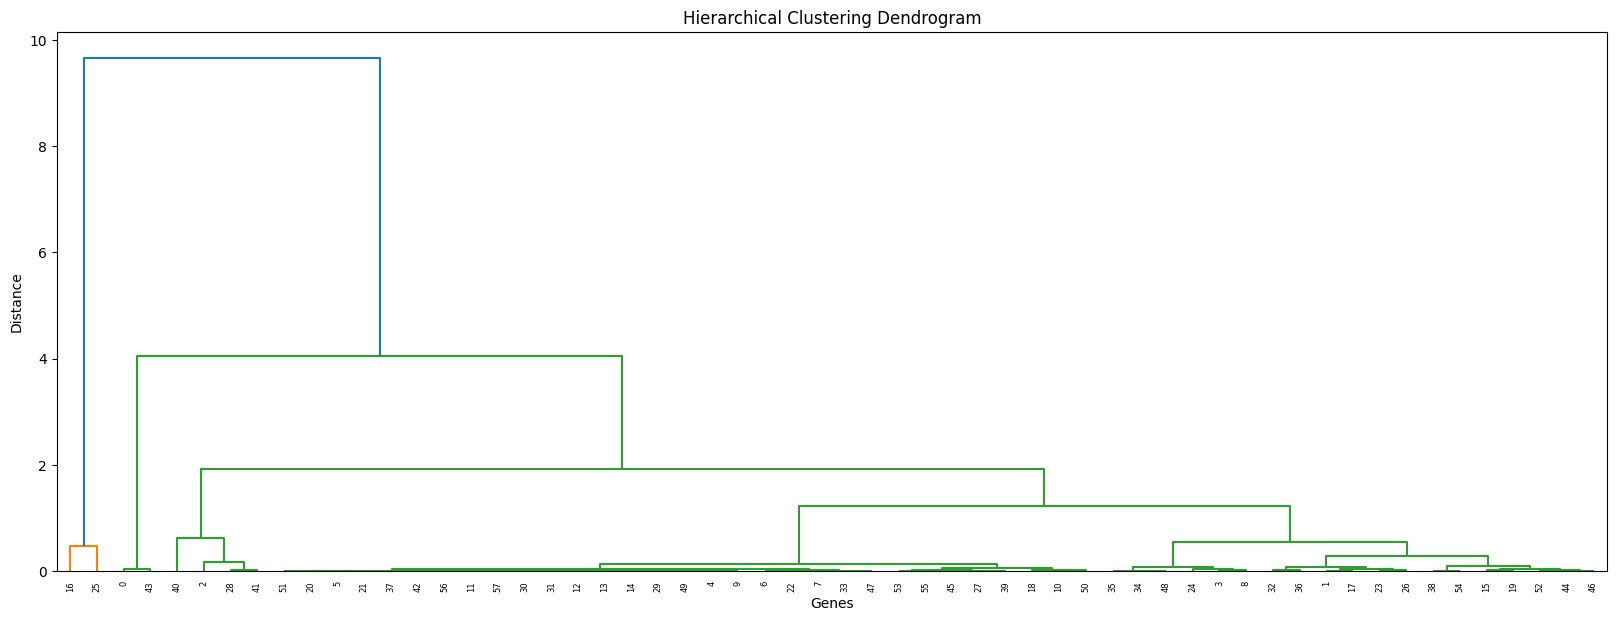

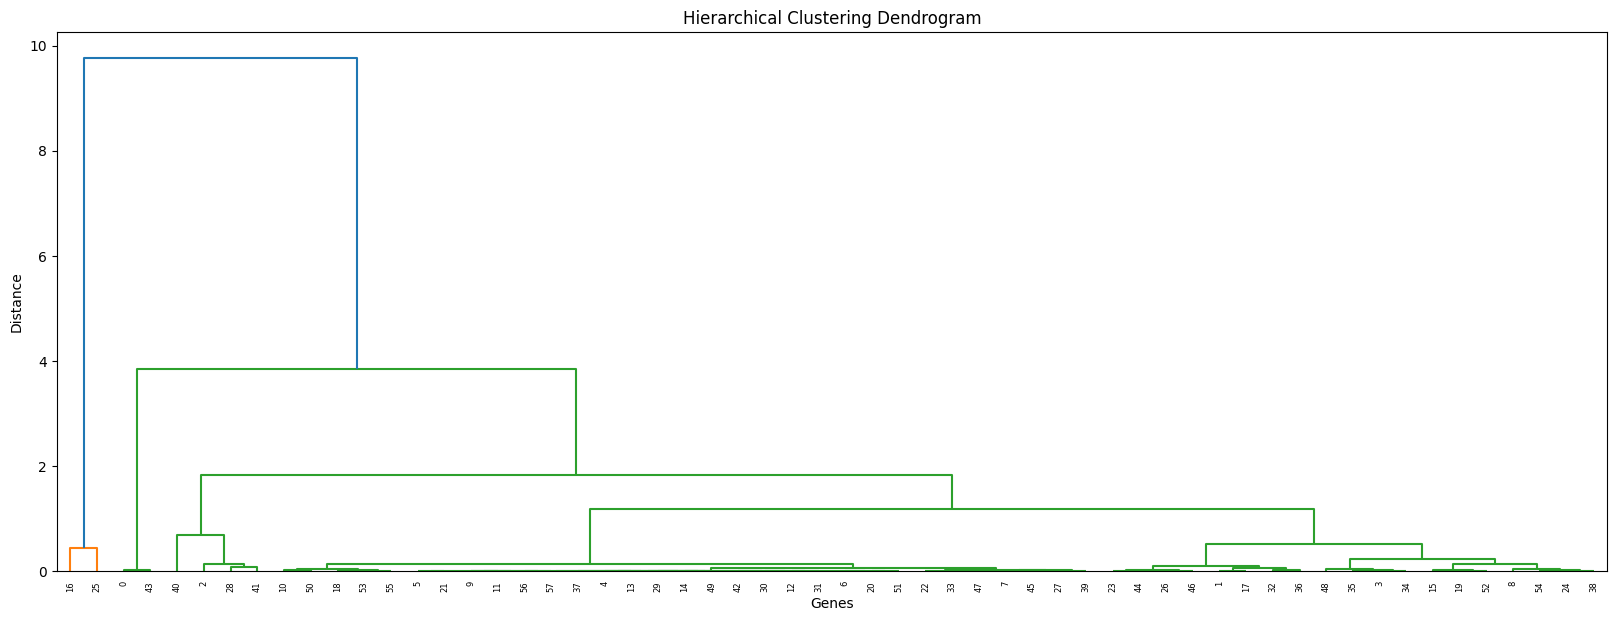

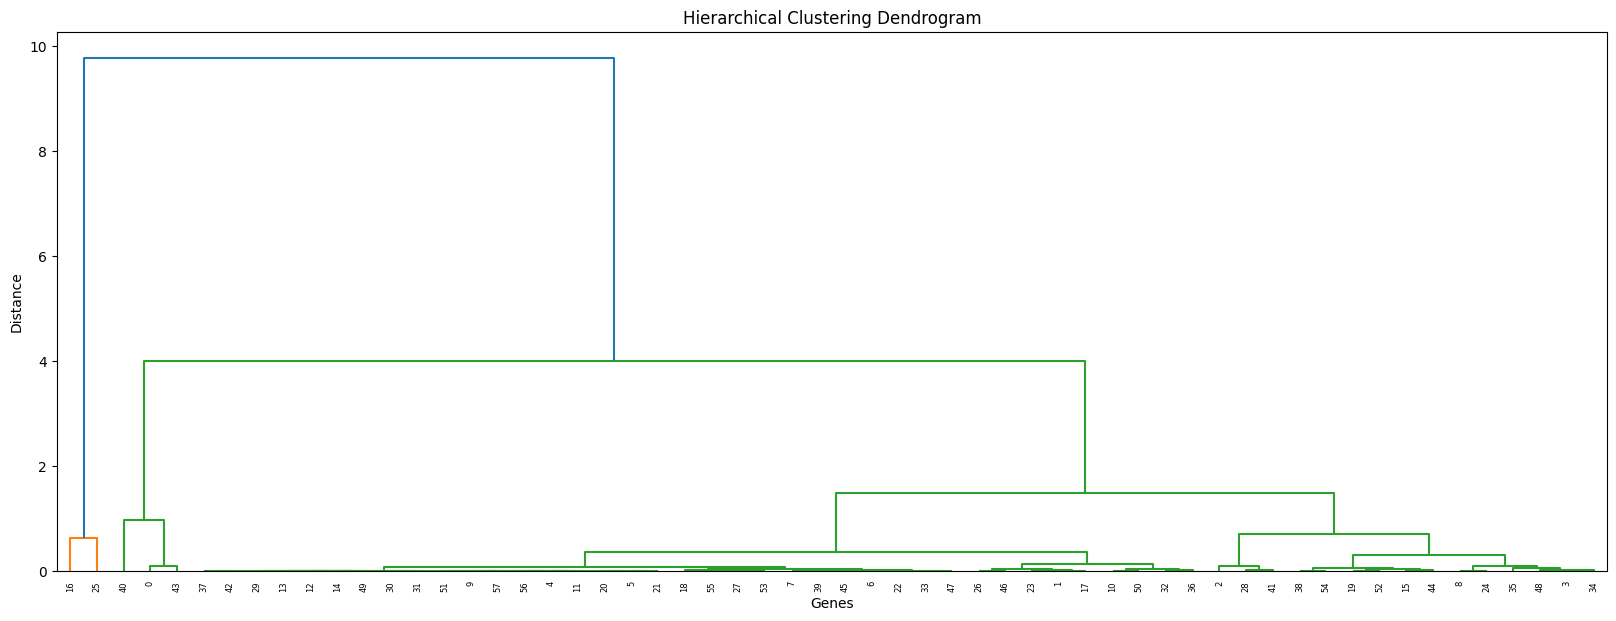

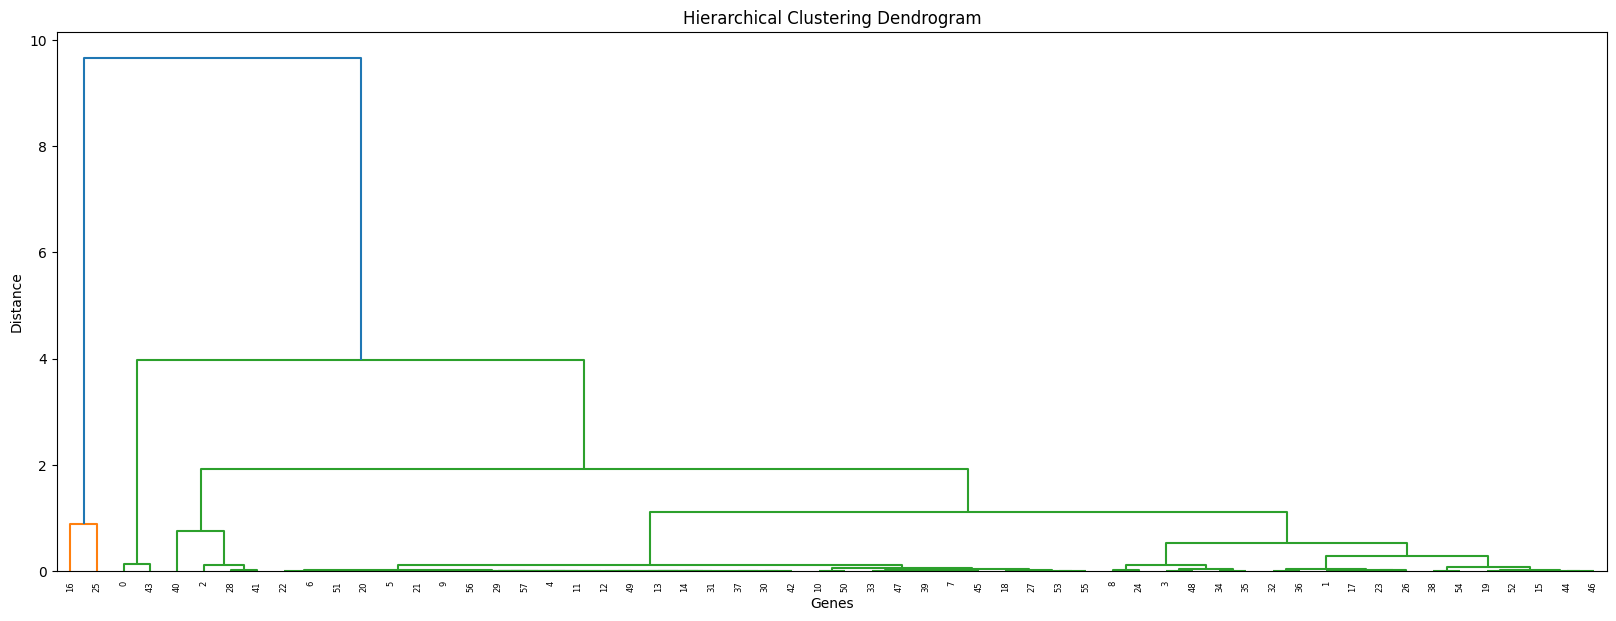

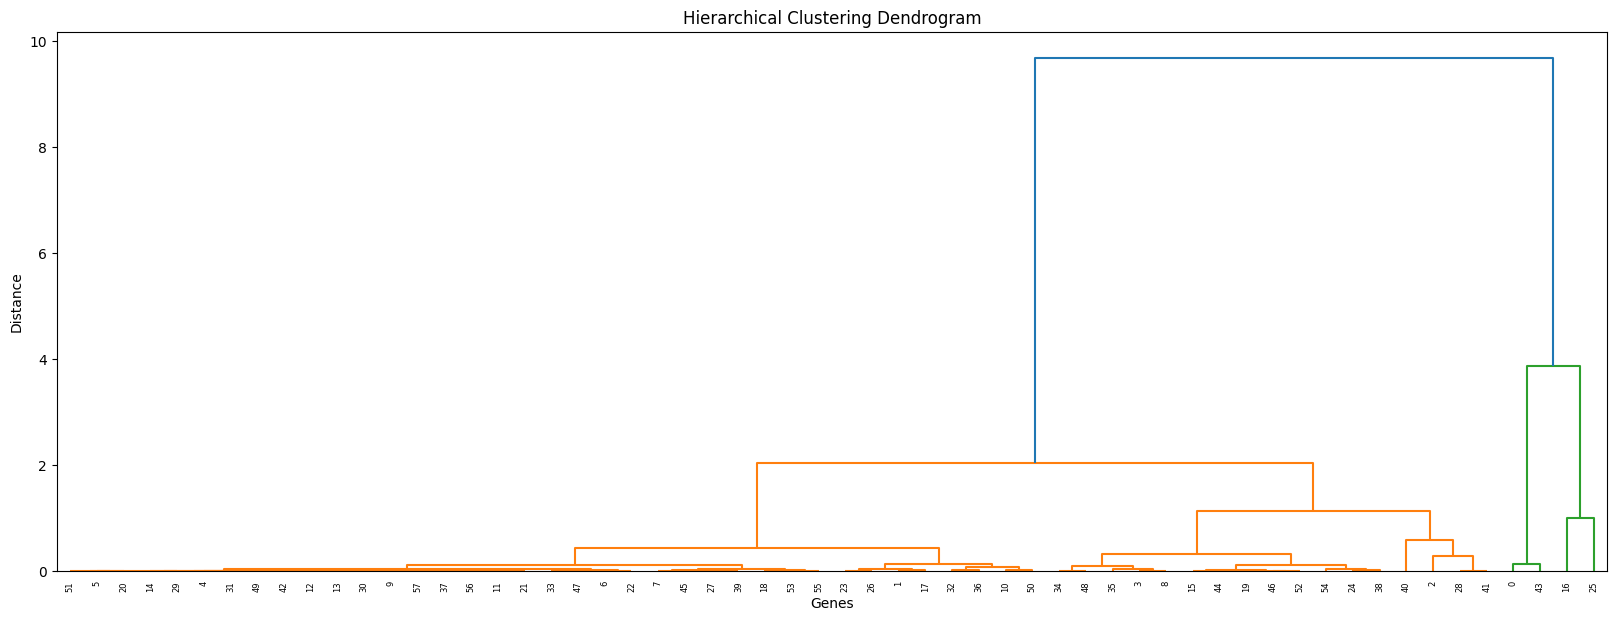

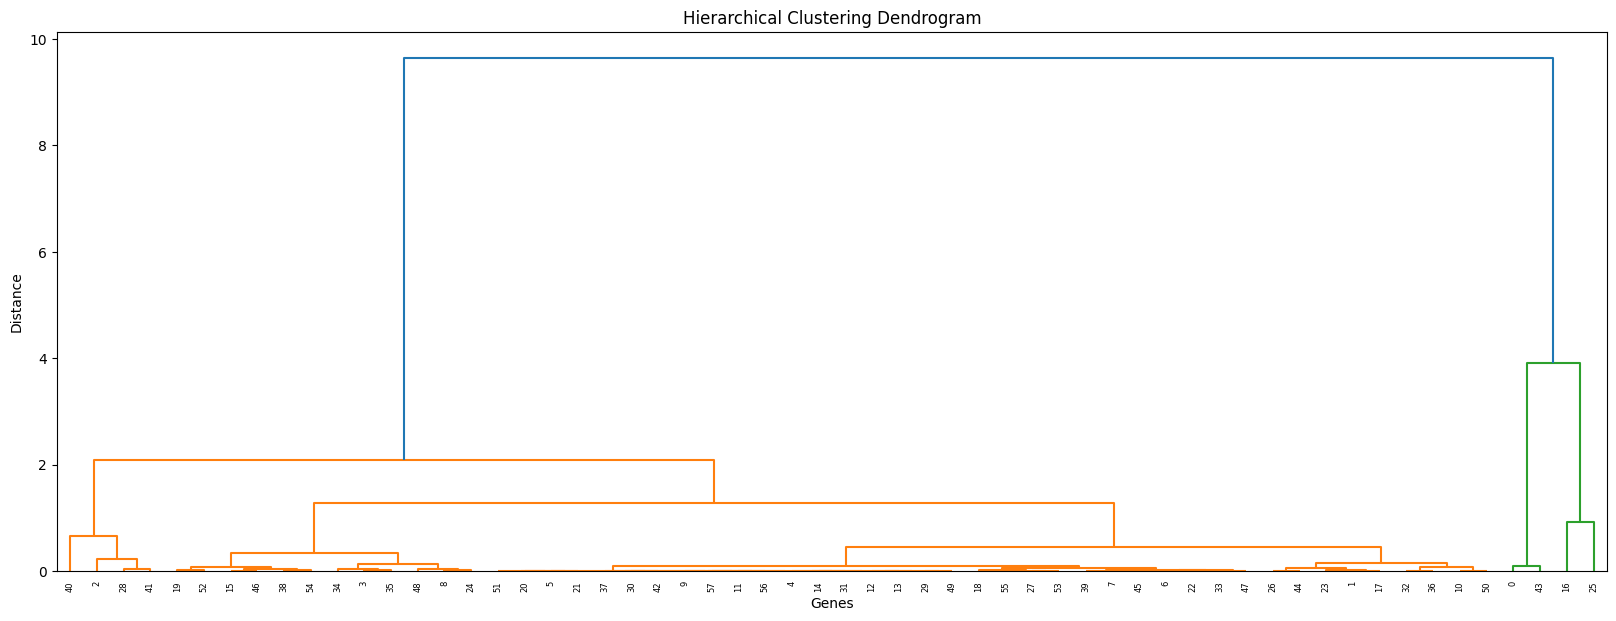

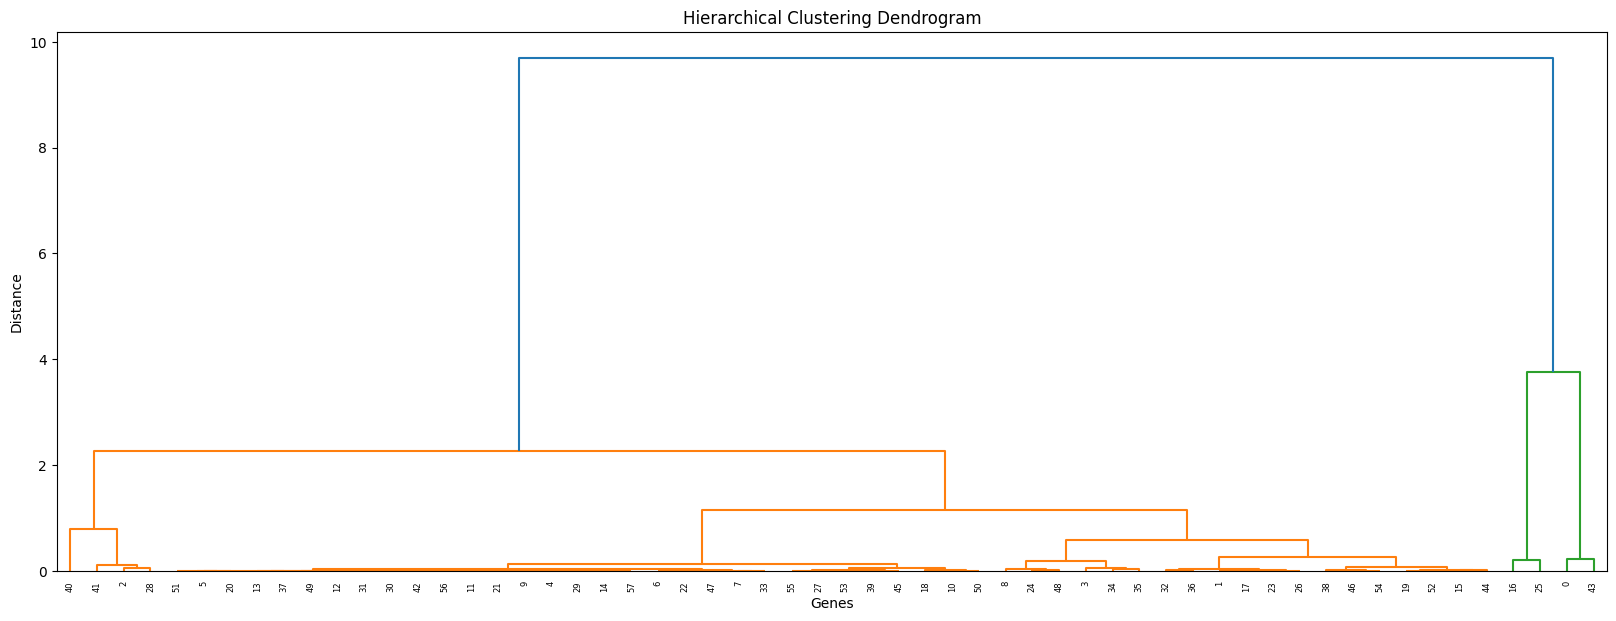

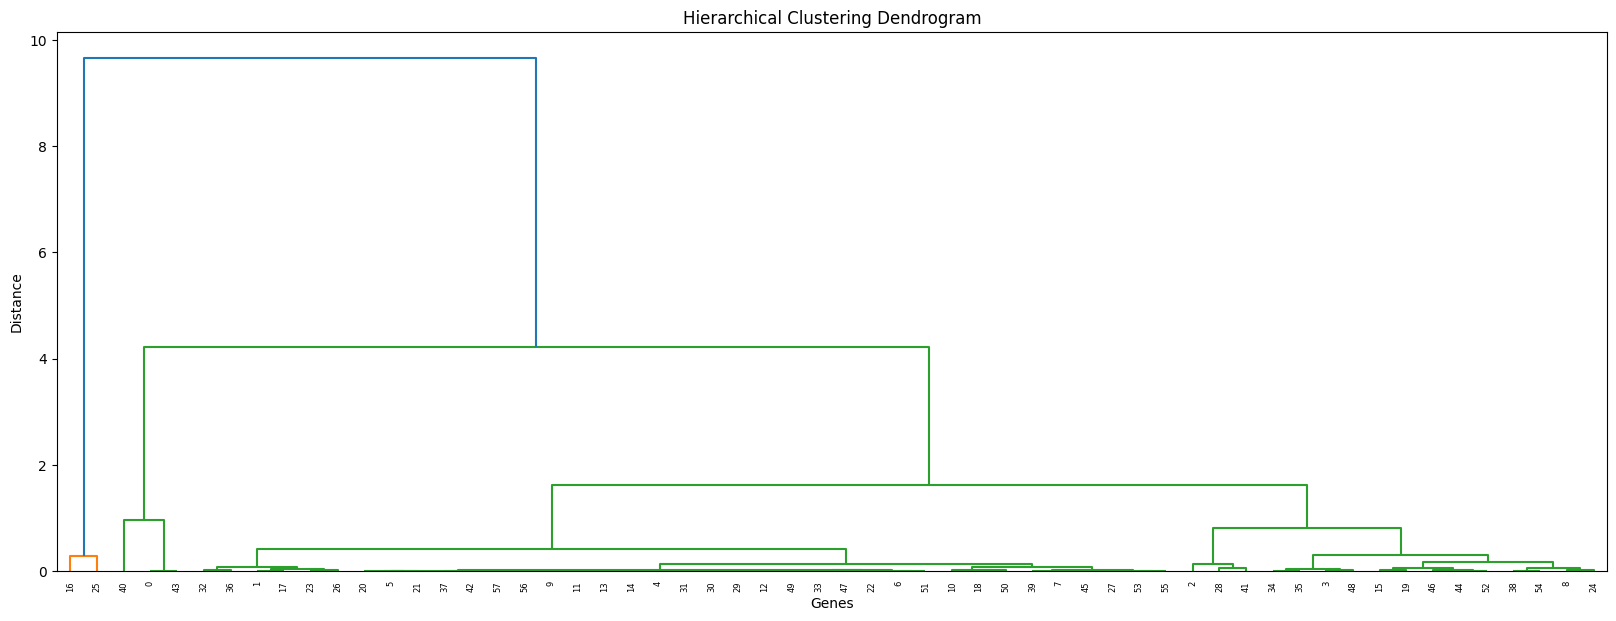

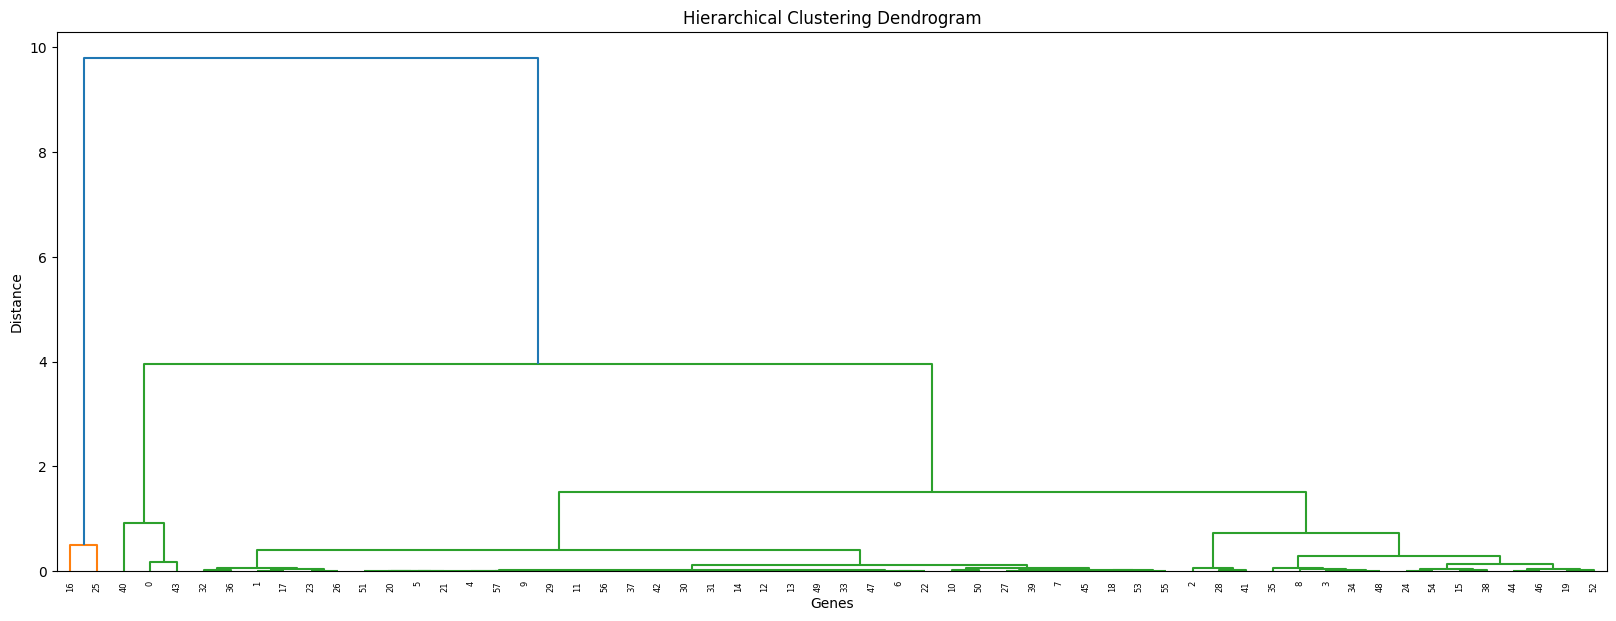

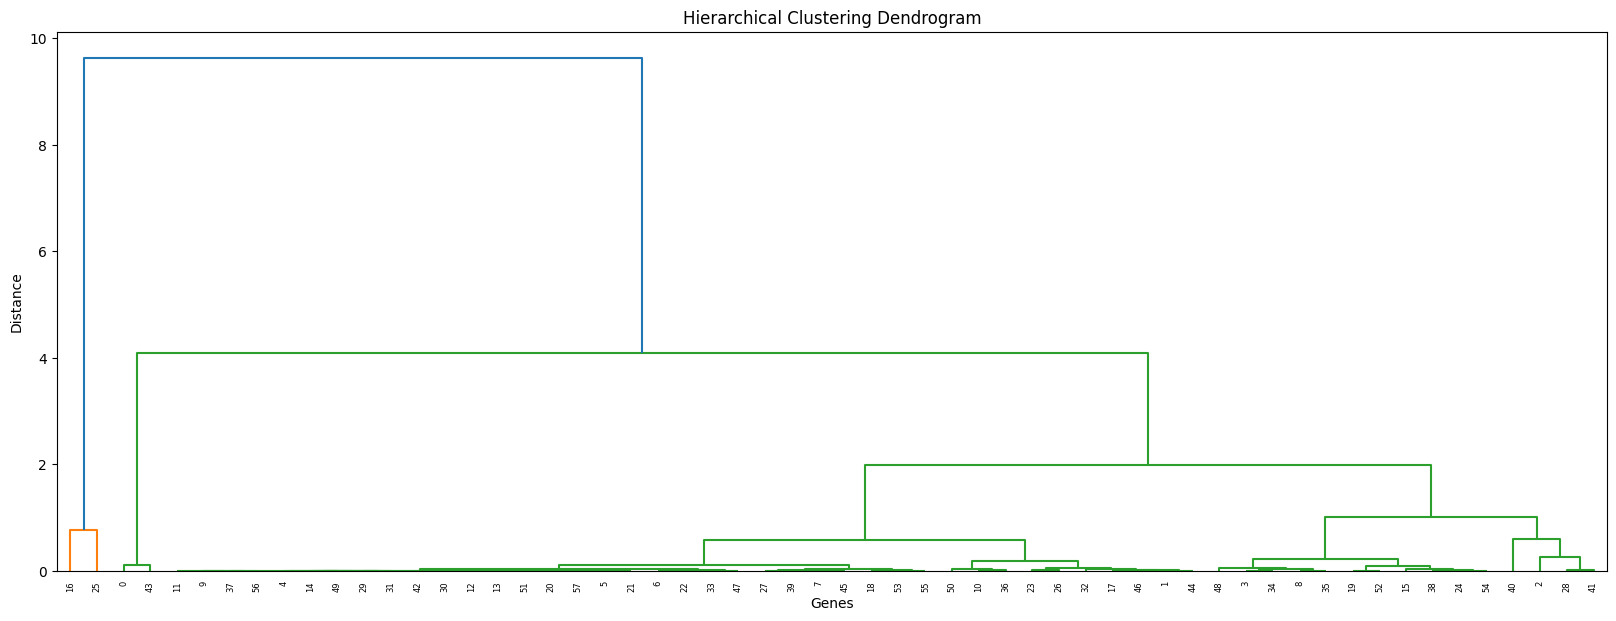

In [16]:
print("Varying the features")
for i in range(12):
  linkage_matrix = hc.linkages(data[:, i:i+1], 'ward')
  plt.figure(figsize=(20, 7))
  dendrogram = hc.dendrogram(linkage_matrix)
  plt.title('Hierarchical Clustering Dendrogram')
  plt.xlabel('Genes')
  plt.ylabel('Distance')
  plt.show()